In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde

In [2]:
def bernoulli_pmf(p):
    """
    Calculate Probability Mass Function for Bernoulli distribution
    """
    x = np.array([0, 1])
    pmf = np.array([1-p, p])
    return x, pmf

def bernoulli_cdf(p):
    """
    Calculate Cumulative Distribution Function for Bernoulli distribution
    """
    x = np.array([-0.5, 0, 1, 1.5])  # Extended range for plotting
    cdf = np.array([0, 1-p, 1, 1])    # CDF values at these points
    return x, cdf

def simulate_bernoulli(p, n_samples):
    """
    Simulate n_samples from Bernoulli distribution
    """
    return np.random.binomial(n=1, p=p, size=n_samples)

def plot_bernoulli_distribution(p, n_samples=1000):
    """
    Create comprehensive visualization of Bernoulli distribution
    including PMF, CDF, and both original and smoothed histograms
    """
    # Create figure with four subplots in a 2x2 grid
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: PMF
    x, pmf = bernoulli_pmf(p)
    ax1.bar(x, pmf, alpha=0.8, color='blue', label='PMF')
    ax1.set_title(f'Bernoulli PMF (p={p})')
    ax1.set_xlabel('Outcome')
    ax1.set_ylabel('Probability')
    ax1.set_xticks([0, 1])
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: CDF
    x_cdf, cdf = bernoulli_cdf(p)
    ax2.step(x_cdf, cdf, 'r-', label='CDF', where='post')
    ax2.set_title(f'Bernoulli CDF (p={p})')
    ax2.set_xlabel('Outcome')
    ax2.set_ylabel('Cumulative Probability')
    ax2.set_xticks([0, 1])
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Generate samples
    samples = simulate_bernoulli(p, n_samples)
    
    # Plot 3: Original Histogram
    ax3.hist(samples, bins=[-0.5, 0.5, 1.5], density=True, alpha=0.7,
             color='green', label='Original Histogram')
    ax3.set_title(f'Original Histogram\n{n_samples} Trials (p={p})')
    ax3.set_xlabel('Outcome')
    ax3.set_ylabel('Density')
    ax3.set_xticks([0, 1])
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Plot 4: Smoothed Histogram with KDE
    # Create regular histogram
    ax4.hist(samples, bins=[-0.5, 0.5, 1.5], density=True, alpha=0.3,
             color='green', label='Histogram')
    
    # Add kernel density estimation
    x_kde = np.linspace(-0.5, 1.5, 200)
    kde = gaussian_kde(samples, bw_method=0.1)
    ax4.plot(x_kde, kde(x_kde), 'r-', label='KDE Smoothing', linewidth=2)
    
    ax4.set_title(f'Smoothed Histogram with KDE\n{n_samples} Trials (p={p})')
    ax4.set_xlabel('Outcome')
    ax4.set_ylabel('Density')
    ax4.set_xticks([0, 1])
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    
    plt.tight_layout()
    return fig

In [3]:
# Example usage
p = 0.3  # probability of success
n_samples = 2000

In [4]:
# Calculate theoretical mean and variance
mean = p
variance = p * (1-p)

In [5]:
# Generate samples
samples = simulate_bernoulli(p, n_samples)

In [6]:
# Calculate sample statistics
sample_mean = np.mean(samples)
sample_variance = np.var(samples)

Theoretical Mean: 0.300
Sample Mean: 0.311
Theoretical Variance: 0.210
Sample Variance: 0.214


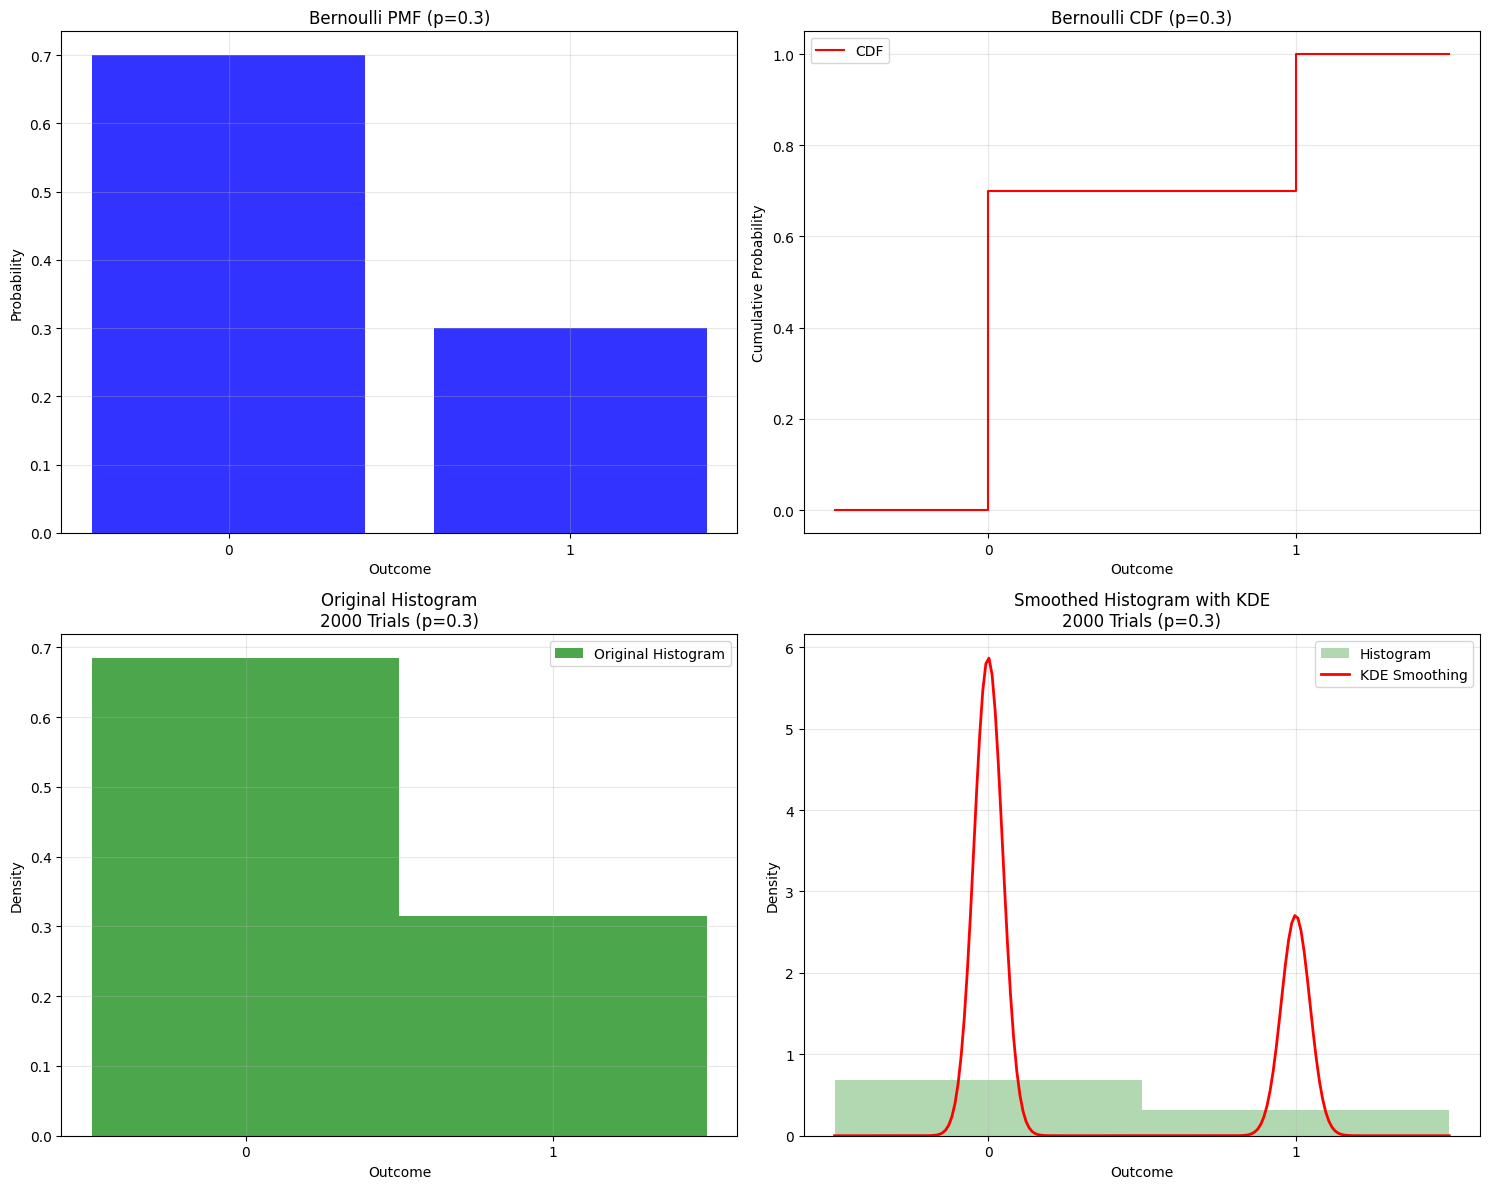

In [7]:
# Print statistics
print(f"Theoretical Mean: {mean:.3f}")
print(f"Sample Mean: {sample_mean:.3f}")
print(f"Theoretical Variance: {variance:.3f}")
print(f"Sample Variance: {sample_variance:.3f}")

# Create and display plot
plot_bernoulli_distribution(p, n_samples)
plt.show()

Theoretical Mean: 0.300
Sample Mean: 0.298
Theoretical Variance: 0.210
Sample Variance: 0.209


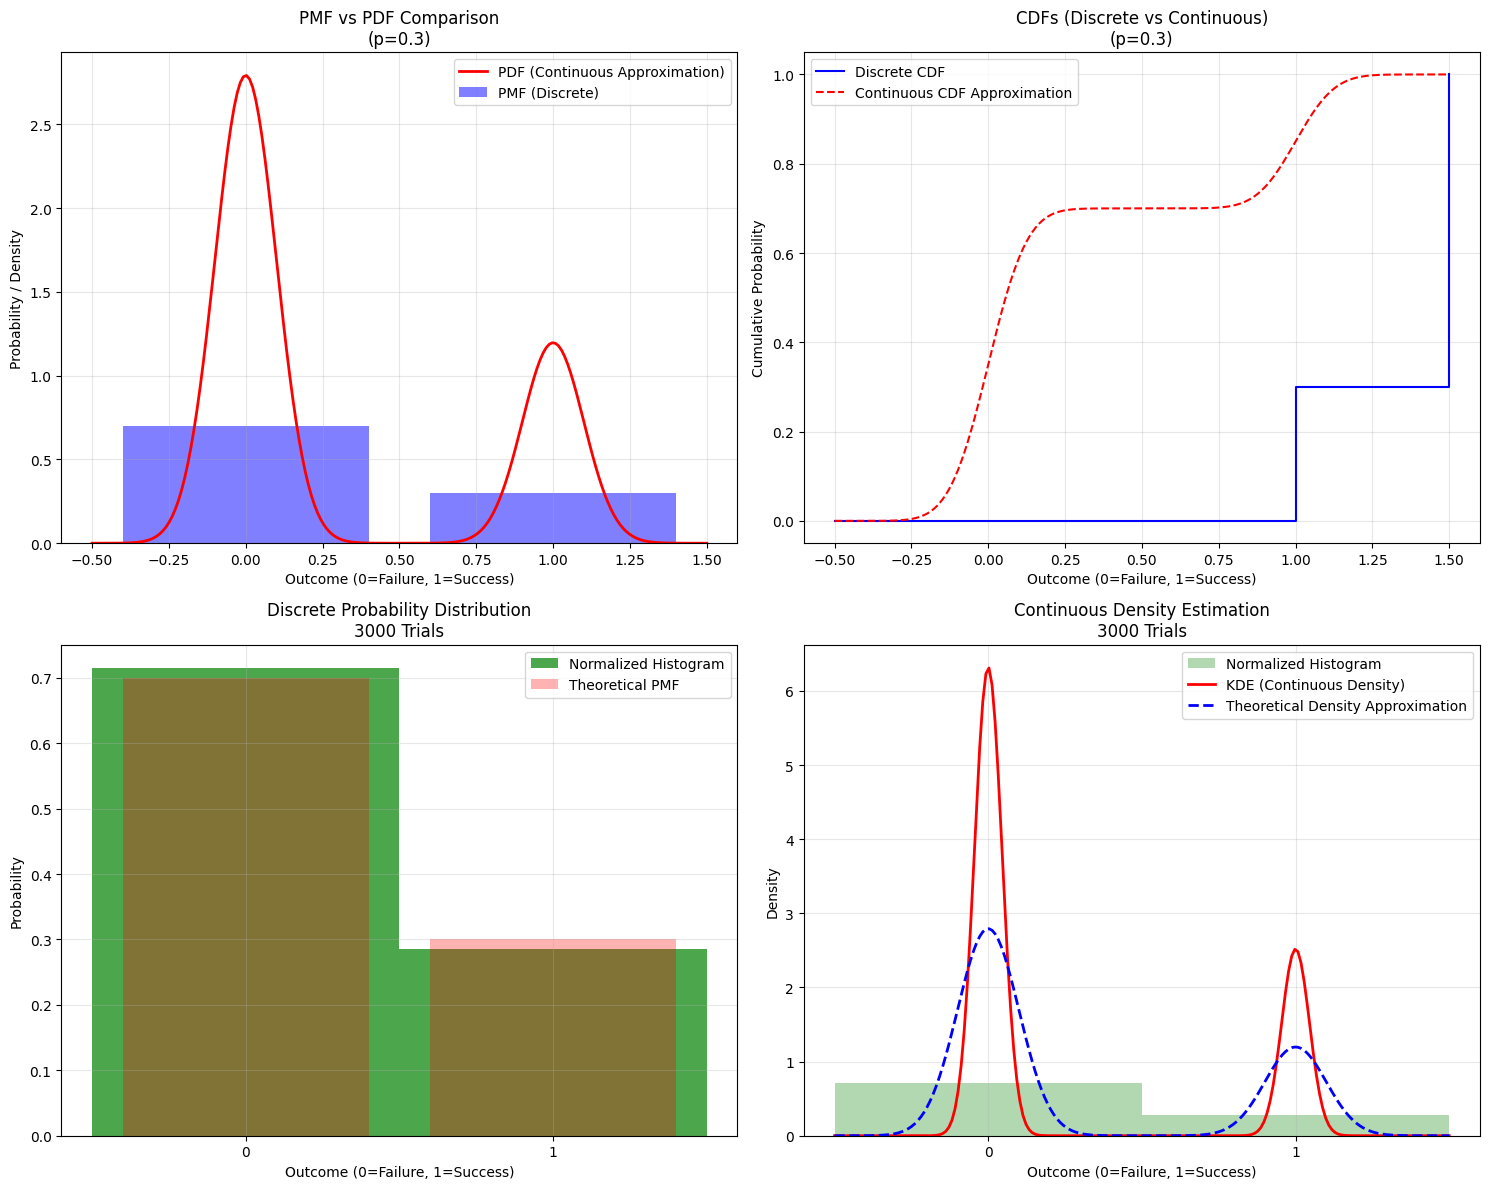

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde

def bernoulli_pmf(p):
    """
    Calculate Probability Mass Function for Bernoulli distribution
    """
    x = np.array([0, 1])
    pmf = np.array([1-p, p])
    return x, pmf

def bernoulli_pdf_approximation(p):
    """
    Calculate continuous approximation (PDF) for Bernoulli distribution
    Using a mixture of two normal distributions centered at 0 and 1
    """
    x = np.linspace(-0.5, 1.5, 200)
    # Create a mixture of two narrow normal distributions
    pdf = (1-p) * stats.norm.pdf(x, 0, 0.1) + p * stats.norm.pdf(x, 1, 0.1)
    return x, pdf

def bernoulli_cdf(p):
    """
    Calculate Cumulative Distribution Function for Bernoulli distribution
    """
    x = np.array([-0.5, 0, 1, 1.5])
    cdf = np.array([0, 0, p, 1])
    return x, cdf

def simulate_bernoulli(p, n_samples):
    """
    Simulate n_samples from Bernoulli distribution
    """
    return np.random.binomial(n=1, p=p, size=n_samples)

def plot_bernoulli_distribution(p, n_samples=1000):
    """
    Create comprehensive visualization of Bernoulli distribution
    including PMF, PDF, CDF, and density estimations
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: PMF and PDF Comparison
    x_pmf, pmf = bernoulli_pmf(p)
    x_pdf, pdf = bernoulli_pdf_approximation(p)
    
    # Plot PMF as bars
    ax1.bar(x_pmf, pmf, alpha=0.5, color='blue', label='PMF (Discrete)')
    # Plot PDF as continuous approximation
    ax1.plot(x_pdf, pdf, 'r-', label='PDF (Continuous Approximation)', linewidth=2)
    
    ax1.set_title(f'PMF vs PDF Comparison\n(p={p})')
    ax1.set_xlabel('Outcome (0=Failure, 1=Success)')
    ax1.set_ylabel('Probability / Density')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: CDF
    x_cdf, cdf = bernoulli_cdf(p)
    ax2.step(x_cdf, cdf, 'b-', label='Discrete CDF', where='post')
    
    # Add continuous CDF approximation
    x_cont = np.linspace(-0.5, 1.5, 200)
    cdf_cont = (1-p) * stats.norm.cdf(x_cont, 0, 0.1) + p * stats.norm.cdf(x_cont, 1, 0.1)
    ax2.plot(x_cont, cdf_cont, 'r--', label='Continuous CDF Approximation')
    
    ax2.set_title(f'CDFs (Discrete vs Continuous)\n(p={p})')
    ax2.set_xlabel('Outcome (0=Failure, 1=Success)')
    ax2.set_ylabel('Cumulative Probability')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Generate samples
    samples = simulate_bernoulli(p, n_samples)
    
    # Plot 3: Histogram with PMF
    bins = np.array([-0.5, 0.5, 1.5])
    ax3.hist(samples, bins=bins, density=True, alpha=0.7,
             color='green', label='Normalized Histogram')
    ax3.bar(x_pmf, pmf, alpha=0.3, color='red', label='Theoretical PMF')
    
    ax3.set_title(f'Discrete Probability Distribution\n{n_samples} Trials')
    ax3.set_xlabel('Outcome (0=Failure, 1=Success)')
    ax3.set_ylabel('Probability')
    ax3.set_xticks([0, 1])
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Plot 4: Density Estimation
    ax4.hist(samples, bins=bins, density=True, alpha=0.3,
             color='green', label='Normalized Histogram')
    
    # KDE (continuous density estimation)
    kde = gaussian_kde(samples, bw_method=0.1)  # Small bandwidth for sharp peaks
    x_kde = np.linspace(-0.5, 1.5, 200)
    ax4.plot(x_kde, kde(x_kde), 'r-', label='KDE (Continuous Density)', linewidth=2)
    
    # Add theoretical PDF approximation
    ax4.plot(x_pdf, pdf, 'b--', label='Theoretical Density Approximation', linewidth=2)
    
    ax4.set_title(f'Continuous Density Estimation\n{n_samples} Trials')
    ax4.set_xlabel('Outcome (0=Failure, 1=Success)')
    ax4.set_ylabel('Density')
    ax4.set_xticks([0, 1])
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    
    plt.tight_layout()
    return fig

# Example usage
p = 0.3   # probability of success
n_samples = 3000

# Calculate theoretical mean and variance
mean = p
variance = p * (1-p)

# Generate samples
samples = simulate_bernoulli(p, n_samples)

# Calculate sample statistics
sample_mean = np.mean(samples)
sample_variance = np.var(samples)

# Print statistics
print(f"Theoretical Mean: {mean:.3f}")
print(f"Sample Mean: {sample_mean:.3f}")
print(f"Theoretical Variance: {variance:.3f}")
print(f"Sample Variance: {sample_variance:.3f}")

# Create and display plot
plot_bernoulli_distribution(p, n_samples)
plt.show()